In [31]:
import pandas as pd
from collections import namedtuple

## Loading files:

### Candidates:
it contains the candidate:
- seriesid,
- coordinates of candidates (x,y,z),
- class: 0 for a candidate that is not and actual nodule, 1 for a candidate that is a nodule, either malignant or benign.

### Annotation:
it contains information about some of the candidates:
- seriesid,
- coordinates of candidates (x,y,z),
- diameter_mm: the diameter of each candidate.

In [34]:
df_can = pd.read_csv('./luna/candidates.csv')
df_ann = pd.read_csv('./luna/annotations.csv')
df_can.loc[0,'seriesuid']

'1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860'

In [28]:
print(f"# of candidates: {df_can.shape[0]}")
df_can.head()

# of candidates: 551065


,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [13]:
df_ann.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [29]:
print(df_can['class'].value_counts())
df_can['class'].value_counts(normalize=True)

0    549714
1      1351
Name: class, dtype: int64


0    0.997548
1    0.002452
Name: class, dtype: float64

<AxesSubplot:>

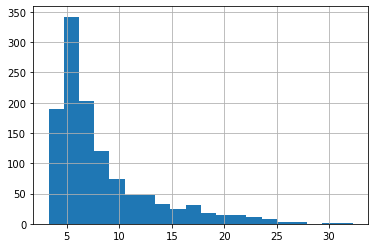

In [30]:
df_ann['diameter_mm'].hist(bins=20)